# Question 1 - 
#### Prepare a classification model using SVM for salary data 

In [2]:
import pandas as pd
salary = pd.read_csv('SalaryData_Train(1).csv')
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
salary.shape

(30161, 14)

In [5]:
salary.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
salary.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
salary['workclass']=le.fit_transform(salary['workclass'])
salary['education']=le.fit_transform(salary['education'])
salary['maritalstatus']=le.fit_transform(salary['maritalstatus'])
salary['occupation']=le.fit_transform(salary['occupation'])
salary['relationship']=le.fit_transform(salary['relationship'])
salary['race']=le.fit_transform(salary['race'])
salary['sex']=le.fit_transform(salary['sex'])
salary['native']=le.fit_transform(salary['native'])
salary['Salary']=le.fit_transform(salary['Salary'])
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [20]:
salary.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
Salary           int32
dtype: object

In [21]:
import numpy as np
import pandas as pd
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [37]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [67]:
from sklearn.model_selection import train_test_split

# Taking only the features that is important for now
X = salary[['age', 'workclass','education', 'educationno','maritalstatus', 'occupation','relationship', 'race','sex', 'capitalgain','capitalloss', 'hoursperweek','native']]

# Taking the labels (Income)
Y = salary['Salary']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [68]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7936350074589756


In [71]:
from sklearn.model_selection import train_test_split

# Taking only the features that is important for now
X = salary[['age', 'educationno','hoursperweek','sex', 'capitalgain']]

# Taking the labels (Income)
Y = salary['Salary']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [72]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7957898226421349


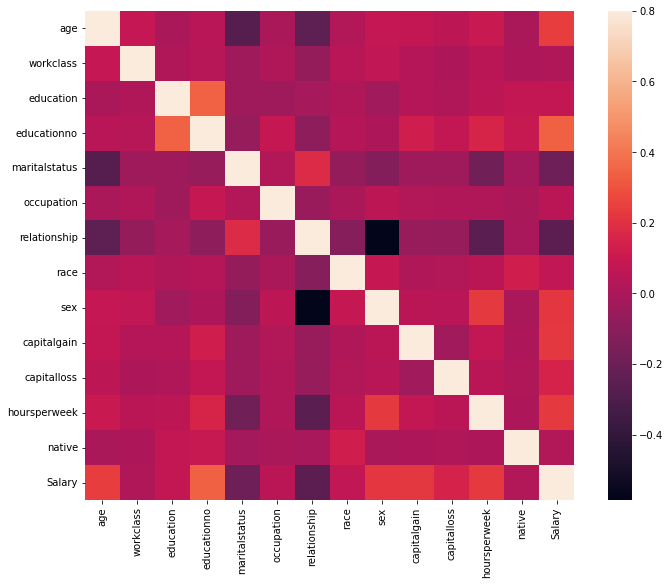

In [40]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = salary.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

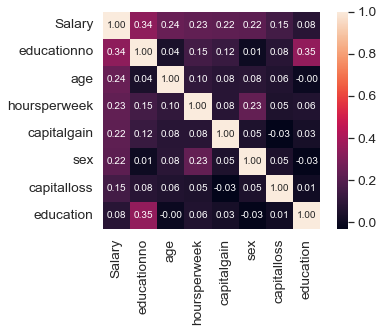

In [41]:
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Salary')['Salary'].index
cm = np.corrcoef(salary[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

# Question 2

In [56]:
forest=pd.read_csv('forestfires.csv')
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [57]:
forest['month']=le.fit_transform(forest['month'])
forest['day']=le.fit_transform(forest['day'])
forest['size_category']=le.fit_transform(forest['size_category'])
forest


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
forest.dtypes

month              int32
day                int32
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category      int32
dtype: object

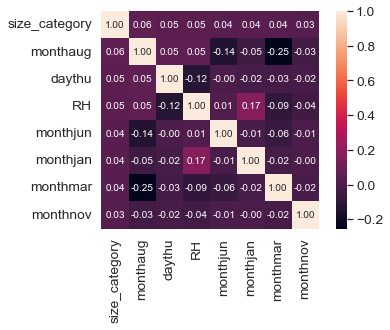

In [61]:
corrmat = forest.corr()
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k,'size_category')['size_category'].index
cm = np.corrcoef(forest[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

In [62]:
from sklearn.model_selection import train_test_split

# Taking only the features that is important for now
X = forest[['monthaug', 'daythu','RH']]

# Taking the labels (Income)
Y = forest['size_category']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [63]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7115384615384616


In [77]:
# Taking only the features that is important for now
X = forest[['monthaug', 'daythu','RH','monthjun','monthjan','monthmar']]

# Taking the labels (Income)
Y = forest['size_category']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [78]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7115384615384616
